In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv("MoviesOnStreamingPlatforms.csv")

In [115]:
df.dropna(how="any", inplace=True)

#drop Unnamed: 0
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [116]:
df.head()

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [117]:
df.shape

(5338, 10)

In [118]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace("/100", "")
df.head()

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,The Irishman,2019,18+,98,1,0,0,0,0
1,2,Dangal,2016,7+,97,1,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95,1,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94,1,0,0,0,0
4,5,Roma,2018,18+,94,1,0,0,0,0


In [119]:
#convert to numeric
df['Rotten Tomatoes'] = pd.to_numeric(df['Rotten Tomatoes'])

In [120]:
df.head()

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,The Irishman,2019,18+,98,1,0,0,0,0
1,2,Dangal,2016,7+,97,1,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95,1,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94,1,0,0,0,0
4,5,Roma,2018,18+,94,1,0,0,0,0


In [121]:
df.drop("Type", inplace=True, axis=1)

#change column names Rotten Tomatoes to Tomatoes and Prime Video to Prime
df.rename(columns={"Rotten Tomatoes": "Tomatoes", "Prime Video": "Prime"}, inplace=True)

df.drop('ID', axis=1, inplace=True)



In [122]:

correlations = df.corr()
print(correlations)

              Year  Tomatoes   Netflix      Hulu     Prime   Disney+
Year      1.000000  0.001705  0.304465  0.060697 -0.200197 -0.202292
Tomatoes  0.001705  1.000000  0.119423  0.157386 -0.264598  0.103534
Netflix   0.304465  0.119423  1.000000 -0.260710 -0.560963 -0.291046
Hulu      0.060697  0.157386 -0.260710  1.000000 -0.252953 -0.149875
Prime    -0.200197 -0.264598 -0.560963 -0.252953  1.000000 -0.318560
Disney+  -0.202292  0.103534 -0.291046 -0.149875 -0.318560  1.000000


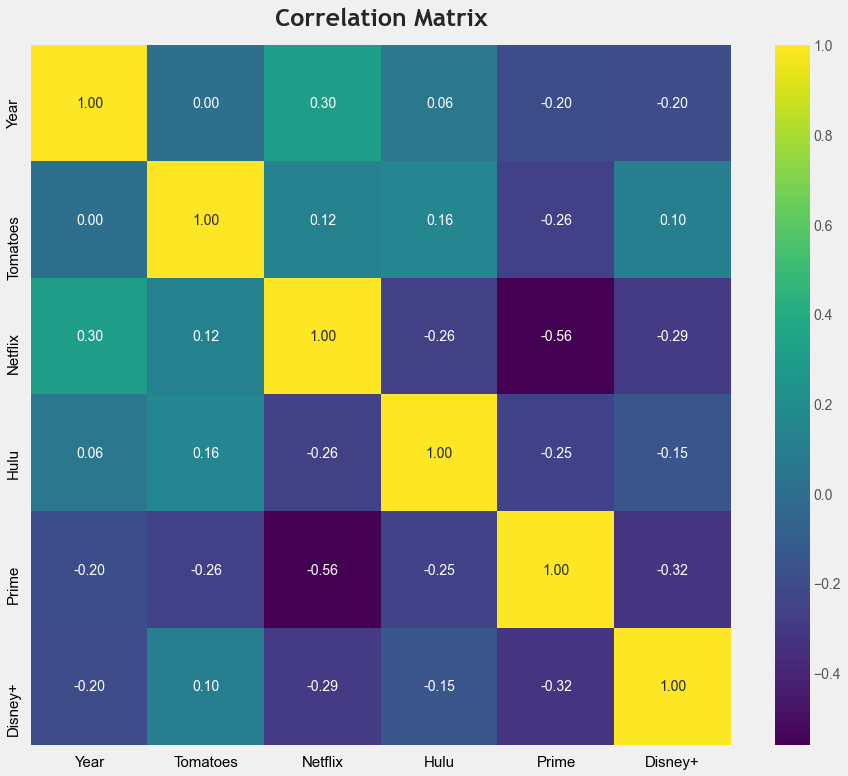

In [123]:
#always remember your magic function if using Jupyter
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(correlations, vmax=1, square=True, annot=True, fmt='.2f', cmap='viridis')
plt.title("Correlation Matrix", fontname = "Trebuchet MS", fontsize = 25, pad=20, fontweight = "bold")
plt.tick_params(axis='both', which='major', labelsize=15, labelcolor='black', pad=10)
plt.savefig('CorrelationMatrix.png', bbox_inches='tight', dpi=300)
plt.show()

In [124]:
#plot different bar charts for Netflix, Hulu,  Prime and Disney+ for top 5 movies based on Tomatoes
df.sort_values(by=['Tomatoes'], ascending=False, inplace=True)
df.head()


,Title,Year,Age,Tomatoes,Netflix,Hulu,Prime,Disney+
0,The Irishman,2019,18+,98,1,0,0,0
1,Dangal,2016,7+,97,1,0,0,0
8615,Mary Poppins,1964,all,96,0,0,0,1
2,David Attenborough: A Life on Our Planet,2020,7+,95,1,0,0,0
3695,The Dark Knight,2008,13+,94,0,1,0,0


In [125]:
#Top 5 movies based on Tomatoes for Netflix, Hulu,  Prime and Disney+

df_Netflix = df.sort_values(by=['Tomatoes'], ascending=False).head(5)

In [126]:
df_Netflix

,Title,Year,Age,Tomatoes,Netflix,Hulu,Prime,Disney+
0,The Irishman,2019,18+,98,1,0,0,0
1,Dangal,2016,7+,97,1,0,0,0
8615,Mary Poppins,1964,all,96,0,0,0,1
2,David Attenborough: A Life on Our Planet,2020,7+,95,1,0,0,0
3695,The Dark Knight,2008,13+,94,0,1,0,0
